# Data 620 Project 1

The purpose of this project was to explore NBA player's shot selections and look for relationships between the shooter and the defender. For this project, I wanted to see if there was a relationship between the offensive players and defensive playres and the shot's outcome.The data that was used was a data I found from kaggle. https://www.kaggle.com/dansbecker/nba-shot-logs. This data is from 2015, but I thought I thought it was a good start for future analysis.

I started out exploring the data and creating a network data, but since almost every player in some play had defeneded every other play, I decided to focus on one team. I focused on the New York Knicks players and how they were defensivly. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np

In [2]:
#load the data
nba = pd.read_csv('shot_logs.csv')
knicks = pd.read_excel('knicks.xlsx')


In [3]:
#quick look at the data and all the columns
print(nba.shape)
print(nba.head())
print(nba.columns)

(128069, 21)
    GAME_ID                   MATCHUP LOCATION  W  FINAL_MARGIN  SHOT_NUMBER  \
0  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            1   
1  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            2   
2  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            3   
3  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            4   
4  21400899  MAR 04, 2015 - CHA @ BKN        A  W            24            5   

   PERIOD GAME_CLOCK  SHOT_CLOCK  DRIBBLES    ...     SHOT_DIST  PTS_TYPE  \
0       1       1:09        10.8         2    ...           7.7         2   
1       1       0:14         3.4         0    ...          28.2         3   
2       1       0:00         NaN         3    ...          10.1         2   
3       2      11:47        10.3         2    ...          17.2         2   
4       2      10:34        10.9         2    ...           3.7         2   

   SHOT_RESULT   CLOSEST_DEFENDER CLOSEST_D

In [4]:
#quick look at the data 2
print(knicks.shape)
print(knicks.head())
print(knicks.columns)

(20, 2)
               player   PPG
0    Anthony, Carmelo  24.2
1    Bargnani, Andrea  14.8
2       Shved, Alexey  14.8
3  Stoudemire, Amar'e  12.0
4  Galloway, Langston  11.8
Index(['player', 'PPG'], dtype='object')


In [5]:
#fix columns and inner join
knicks_d = nba[nba['MATCHUP'].str.contains('NYK')]
knicks_d = knicks_d[['player_name','CLOSEST_DEFENDER','SHOT_RESULT']]
knicks = knicks.rename(columns = {'player':'CLOSEST_DEFENDER'})
knicks_d = pd.merge(left = knicks_d, right = knicks, how = 'inner', on =['CLOSEST_DEFENDER'])
print(knicks_d.head(20))

         player_name    CLOSEST_DEFENDER SHOT_RESULT   PPG
0      brian roberts  Galloway, Langston      missed  11.8
1      brian roberts  Galloway, Langston        made  11.8
2      brian roberts  Galloway, Langston        made  11.8
3      brian roberts  Galloway, Langston        made  11.8
4      brian roberts  Galloway, Langston      missed  11.8
5      brian roberts  Galloway, Langston        made  11.8
6   gerald henderson  Galloway, Langston      missed  11.8
7   gerald henderson  Galloway, Langston        made  11.8
8   gerald henderson  Galloway, Langston      missed  11.8
9   gerald henderson  Galloway, Langston        made  11.8
10  gerald henderson  Galloway, Langston      missed  11.8
11  lance stephenson  Galloway, Langston      missed  11.8
12  lance stephenson  Galloway, Langston      missed  11.8
13  lance stephenson  Galloway, Langston        made  11.8
14     jason maxiell  Galloway, Langston      missed  11.8
15          ed davis  Galloway, Langston      missed  11

In [6]:
#format data
knicks_d[['CLOSEST_DEFENDER','player_name','SHOT_RESULT']]= knicks_d[['CLOSEST_DEFENDER','player_name','SHOT_RESULT']].astype(str)
knicks_d[['PPG']] = knicks_d[['PPG']].apply(pd.to_numeric)

knicks_d.dtypes


player_name          object
CLOSEST_DEFENDER     object
SHOT_RESULT          object
PPG                 float64
dtype: object

In [7]:
#Group offense and defense plays together to get count
knicks_d2 = knicks_d.groupby(['CLOSEST_DEFENDER','player_name','SHOT_RESULT']).size().reset_index('SHOT_RESULT')
knicks_d2=knicks_d2.reset_index()
knicks_d2 = knicks_d2.rename(columns ={0:'Count'})

print(knicks_d2.shape)
print(knicks_d2.head(20))

(2276, 4)
   CLOSEST_DEFENDER       player_name SHOT_RESULT  Count
0       Acy, Quincy      aaron brooks        made      1
1       Acy, Quincy   al farouq aminu      missed      1
2       Acy, Quincy      amir johnson        made      2
3       Acy, Quincy      amir johnson      missed      4
4       Acy, Quincy    andre drummond        made      1
5       Acy, Quincy    andre roberson      missed      1
6       Acy, Quincy    andrew wiggins      missed      3
7       Acy, Quincy     anthony davis      missed      5
8       Acy, Quincy     avery bradley      missed      1
9       Acy, Quincy      ben mclemore      missed      1
10      Acy, Quincy        beno urdih        made      1
11      Acy, Quincy   bismack biyombo        made      1
12      Acy, Quincy  bojan bogdanovic        made      1
13      Acy, Quincy        boris diaw        made      1
14      Acy, Quincy        boris diaw      missed      1
15      Acy, Quincy  brandon jennings      missed      1
16      Acy, Quincy  

Name: 
Type: Graph
Number of nodes: 279
Number of edges: 1686
Average degree:  12.0860


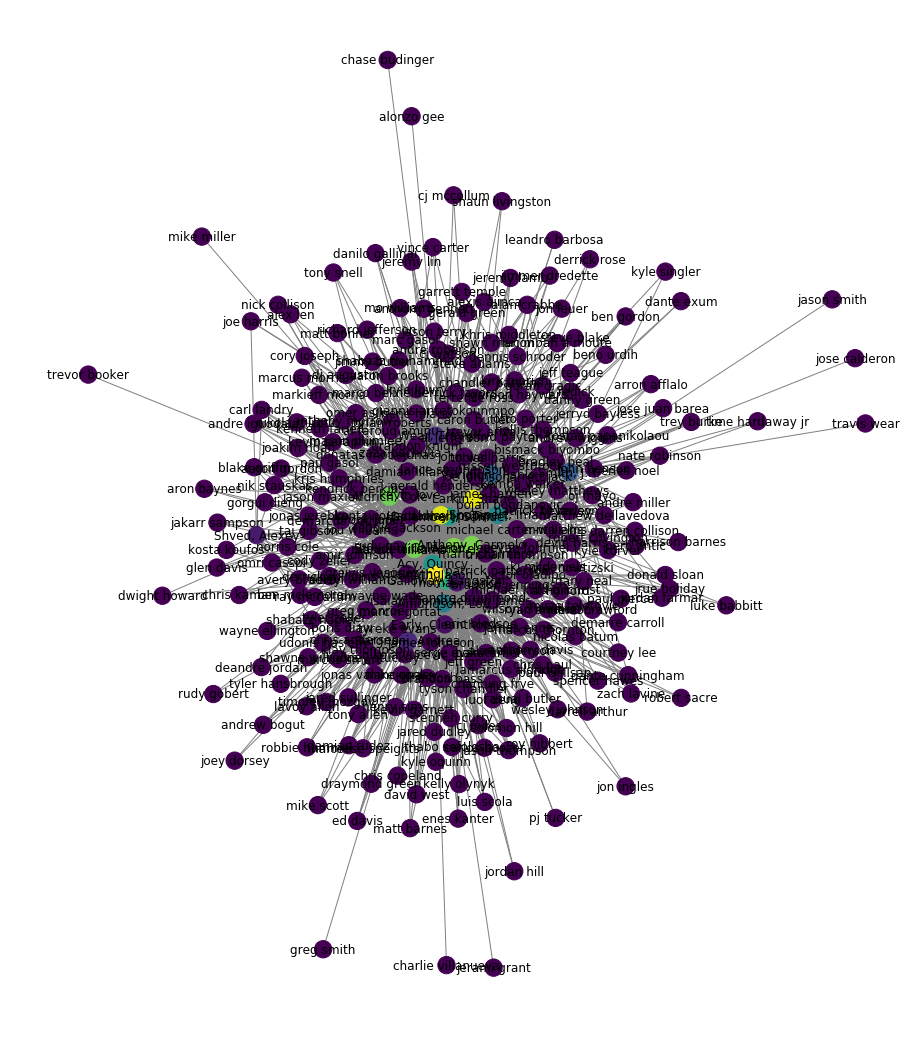

In [8]:
#graph the data
edges = pd.DataFrame(knicks_d2[['player_name','CLOSEST_DEFENDER','Count']])
G =nx.from_pandas_edgelist(edges,'player_name', 'CLOSEST_DEFENDER','Count')
nx.set_node_attributes(G, pd.Series(knicks_d2.SHOT_RESULT).to_dict(),'Shot_Result')

print(nx.info(G))
color_weight = {'Acy, Quincy': 90,
  'Aldrich, Cole': 134,
  'Amundson, Lou': 73,
  'Anthony, Carmelo': 137,
  'Bargnani, Andrea': 19,
  'Calderon, Jose': 139,
  'Dalembert, Samuel': 94,
  'Early, Cleanthony': 6,
  'Galloway, Langston': 107,
  'Hardaway Jr., Tim': 162,
  'Larkin, Shane': 164,
  'Prigioni, Pablo': 54,
  'Shumpert, Iman': 80,
  'Shved, Alexey': 12,
  'Smith, J.R.': 49,
  'Smith, Jason': 171,
  "Stoudemire, Amar'e": 136,
  'Thomas, Lance': 10,
  'Wear, Travis': 21}


values = [color_weight.get(node, 0.25) for node in G.nodes()]
plt.figure(figsize=(12,14))
nx.draw(G, with_labels = True, node_color = values ,edge_color ='gray',pos=nx.spring_layout(G))
plt.draw()
plt.show()

In [14]:
df = pd.DataFrame()
df['CLOSEST_DEFENDER'] = list(G)
df['closeness'] = nx.closeness_centrality(G).values()
df['betweenness'] = nx.betweenness_centrality(G).values()
df['degree'] = nx.degree_centrality(G).values()

From the data we can see that Jason Smith was a high centrality score in closeness, betweenness, and degree. This isn't too surprising since he is a big man that may be a help defender in more than average number of plays. One interesting thing is that the player that averaged the most points is 4th most centrality. 

In [15]:
df = pd.merge(left = df, right = knicks, how = "inner", on =['CLOSEST_DEFENDER'])
df.sort_values('closeness',ascending = False).reset_index(drop=True)

,CLOSEST_DEFENDER,closeness,betweenness,degree,PPG
0,"Smith, Jason",0.556000,0.166422,0.568345,8.0
1,"Hardaway Jr., Tim",0.530534,0.127294,0.525180,11.5
2,"Acy, Quincy",0.500000,0.105536,0.467626,5.9
3,"Anthony, Carmelo",0.494662,0.083158,0.456835,24.2
4,"Larkin, Shane",0.486014,0.097601,0.438849,6.2
5,"Calderon, Jose",0.460265,0.063905,0.381295,9.1
6,"Aldrich, Cole",0.454248,0.064274,0.366906,5.5
7,"Stoudemire, Amar'e",0.454248,0.058510,0.366906,12.0
8,"Dalembert, Samuel",0.442675,0.049398,0.338129,4.0
9,"Prigioni, Pablo",0.441270,0.048067,0.334532,4.7


In [17]:
knicks_good = knicks_d2[knicks_d2.SHOT_RESULT == 'missed']

Since I focused on defense, I looked at shot attempts that were missed and which players were involved in those those plays. So I filtered by the data by shots missed and graphed again using the same technique.

Name: 
Type: Graph
Number of nodes: 275
Number of edges: 1174
Average degree:   8.5382


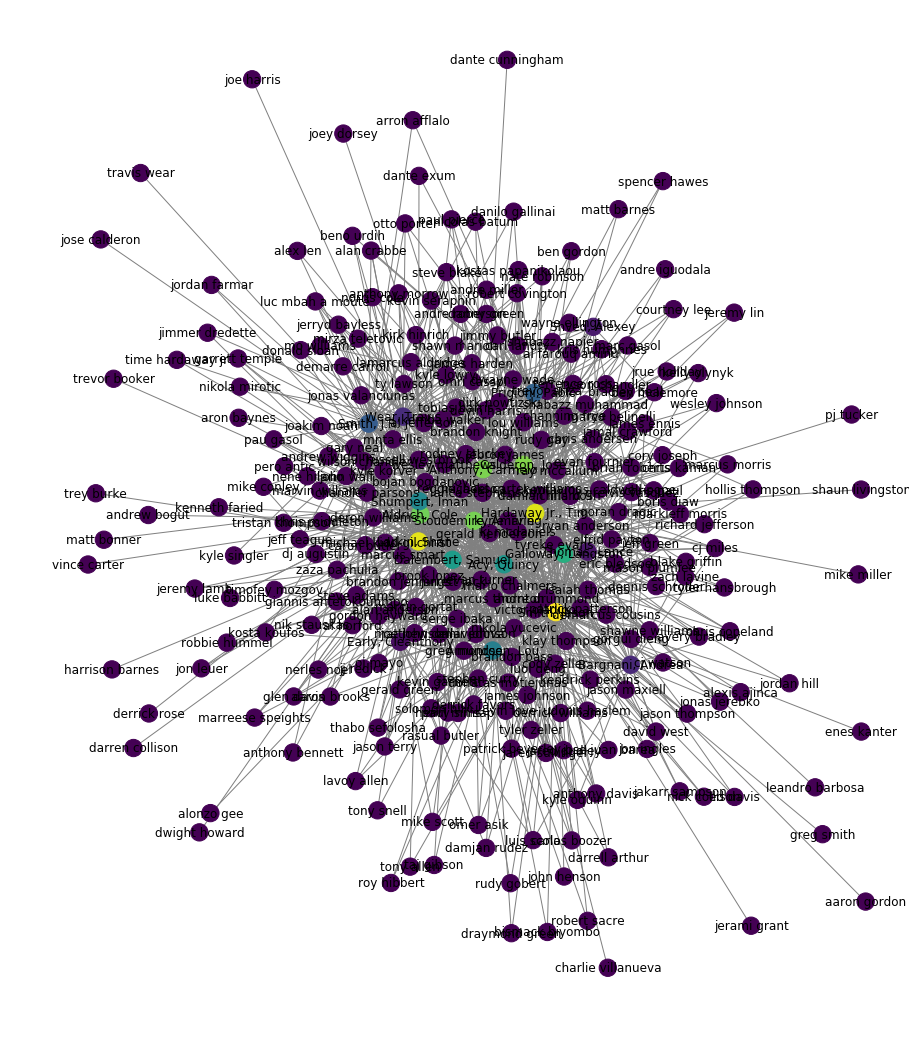

In [18]:
edges = pd.DataFrame(knicks_good[['player_name','CLOSEST_DEFENDER','Count']])
G2 =nx.from_pandas_edgelist(edges,'player_name', 'CLOSEST_DEFENDER','Count')

print(nx.info(G2))
color_weight = {'Acy, Quincy': 90,
  'Aldrich, Cole': 134,
  'Amundson, Lou': 73,
  'Anthony, Carmelo': 137,
  'Bargnani, Andrea': 19,
  'Calderon, Jose': 139,
  'Dalembert, Samuel': 94,
  'Early, Cleanthony': 6,
  'Galloway, Langston': 107,
  'Hardaway Jr., Tim': 162,
  'Larkin, Shane': 164,
  'Prigioni, Pablo': 54,
  'Shumpert, Iman': 80,
  'Shved, Alexey': 12,
  'Smith, J.R.': 49,
  'Smith, Jason': 171,
  "Stoudemire, Amar'e": 136,
  'Thomas, Lance': 10,
  'Wear, Travis': 21}


values = [color_weight.get(node, 0.25) for node in G2.nodes()]
plt.figure(figsize=(12,14))
nx.draw(G2, with_labels = True, node_color = values ,edge_color ='gray',pos=nx.spring_layout(G2))
plt.draw()
plt.show()

From the data we can see that it's quirte different centrality numbers than before. One noticeable change is Shane Larkin jumped from 5th to 3rd most centrality. This means majority of his plays he was involved in resulted in a missed shot.Carmelo Anthony, the team's top player at the time, dropped in centrality meaning he wasn't impactful in defense.

In [23]:
df2 = pd.DataFrame()
df2['CLOSEST_DEFENDER'] = list(G2)
df2['closeness'] = nx.closeness_centrality(G2).values()
df2['betweenness'] = nx.betweenness_centrality(G2).values()
df2['degree'] = nx.degree_centrality(G2).values()
df2 = pd.merge(left = df2, right = knicks, how = "inner", on =['CLOSEST_DEFENDER'])
df2.sort_values('closeness',ascending = False).reset_index(drop=True)

,CLOSEST_DEFENDER,closeness,betweenness,degree,PPG
0,"Smith, Jason",0.482394,0.194655,0.430657,8.0
1,"Hardaway Jr., Tim",0.467577,0.156655,0.397810,11.5
2,"Larkin, Shane",0.437700,0.122658,0.324818,6.2
3,"Acy, Quincy",0.436306,0.107527,0.321168,5.9
4,"Anthony, Carmelo",0.426791,0.081986,0.295620,24.2
5,"Stoudemire, Amar'e",0.422840,0.078367,0.284672,12.0
6,"Dalembert, Samuel",0.420245,0.076072,0.277372,4.0
7,"Calderon, Jose",0.407738,0.053780,0.240876,9.1
8,"Aldrich, Cole",0.406528,0.076233,0.237226,5.5
9,"Wear, Travis",0.398256,0.048434,0.211679,3.9


Lastly, I wanted to look at the team overall so I looked at just shot result and the Knicks players. So I looked at the data between shot results (missed or made) and knicks players and the results is as follows.

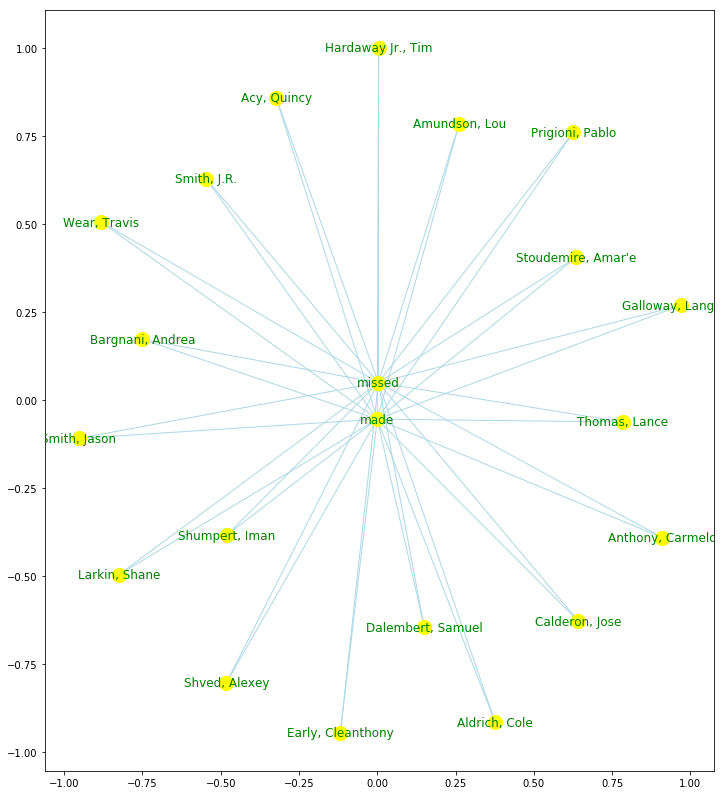

In [26]:
G3=nx.from_pandas_edgelist(knicks_d2,'CLOSEST_DEFENDER','SHOT_RESULT','Count')

plt.figure(figsize=(12,14))

pos=nx.spring_layout(G3, pos = nx.spring_layout(G3))
nx.draw_networkx_labels(G3, pos, with_labels = True, font_color = 'Green')
nx.draw_networkx_edges(G3, pos, edge_color = "Lightblue")
nx.draw_networkx_nodes(G3, pos, node_color = "Yellow", node_size = 200)
plt.draw()
plt.show()

The data here doesn't tell much about defense and offense.Having shot result as a node didn't work since every player is involved in some kind of play that resulted in a miss or made.

In [27]:
df3 = pd.DataFrame()
df3['players'] = list(G3)
df3['eigen'] = nx.eigenvector_centrality(G3).values()
df3['closeness'] = nx.closeness_centrality(G3).values()
df3['betweenness'] = nx.betweenness_centrality(G3).values()
df3['degree'] = nx.degree_centrality(G3).values()
df3.sort_values('closeness',ascending = False).reset_index(drop=True)

df3

,players,eigen,closeness,betweenness,degree
0,"Acy, Quincy",0.162222,0.526316,0.000277,0.10
1,made,0.499999,0.952381,0.450000,0.95
2,missed,0.499999,0.952381,0.450000,0.95
3,"Aldrich, Cole",0.162222,0.526316,0.000277,0.10
4,"Amundson, Lou",0.162222,0.526316,0.000277,0.10
5,"Anthony, Carmelo",0.162222,0.526316,0.000277,0.10
6,"Bargnani, Andrea",0.162222,0.526316,0.000277,0.10
7,"Calderon, Jose",0.162222,0.526316,0.000277,0.10
8,"Dalembert, Samuel",0.162222,0.526316,0.000277,0.10
9,"Early, Cleanthony",0.162222,0.526316,0.000277,0.10


Conclusion: 
The goal was to look at which players on the knicks were good in defensively but the results are inconclusive. Based on the the data, there is evidence that some players were more involved in plays that resulted in missed shots but there needs to be other factors invovled. I need to look at players minutes played and also how well of an offesnive player that player is defending. The more data that is invovled, the better our analysis is.